In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

#plot library
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from helpers import *
from cross_val import *
from preprocessing import *
from plot import *

from run import *

# Data Exploration

In [3]:
DEBUG = False 

In [4]:
PATH_TRAIN= '../data/train.csv'
PATH_TEST = '../data/test.csv'
y, tX, ids = load_csv_data(PATH_TRAIN, sub_sample=DEBUG)
y_test, tX_test, ids_test = load_csv_data(PATH_TEST, sub_sample=DEBUG)
features_name = np.genfromtxt('../data/train.csv', delimiter=",", dtype=str,max_rows=1)[2:]

In [ ]:
print("y train size : ", y.shape[0] )
print("train tX shape : ", tX.shape[0])
print( "y test size : ", y_test.shape[0])
print("test tX shape : ", tX_test.shape)

y train size :  250000
train tX shape :  250000
y test size :  568238
test tX shape :  (568238, 30)


In [ ]:
print("# Higgs signal particules (s): ", len(y[y==1]), '/',round(len(y[y==1])*100/len(y),0),'%')
print("# background particules (b): ", len(y[y==-1]), '/',round(len(y[y==-1])*100/len(y),0),'%')

# Higgs signal particules (s):  85667 / 34.0 %
# background particules (b):  164333 / 66.0 %


In [ ]:
print("There are" , len(tX[tX==-999.0]),'(',
      np.round(len(tX[tX==-999.0])*100./(len(tX)*30)),  "%), missing values")

There are 1580052 ( 21.0 %), missing values


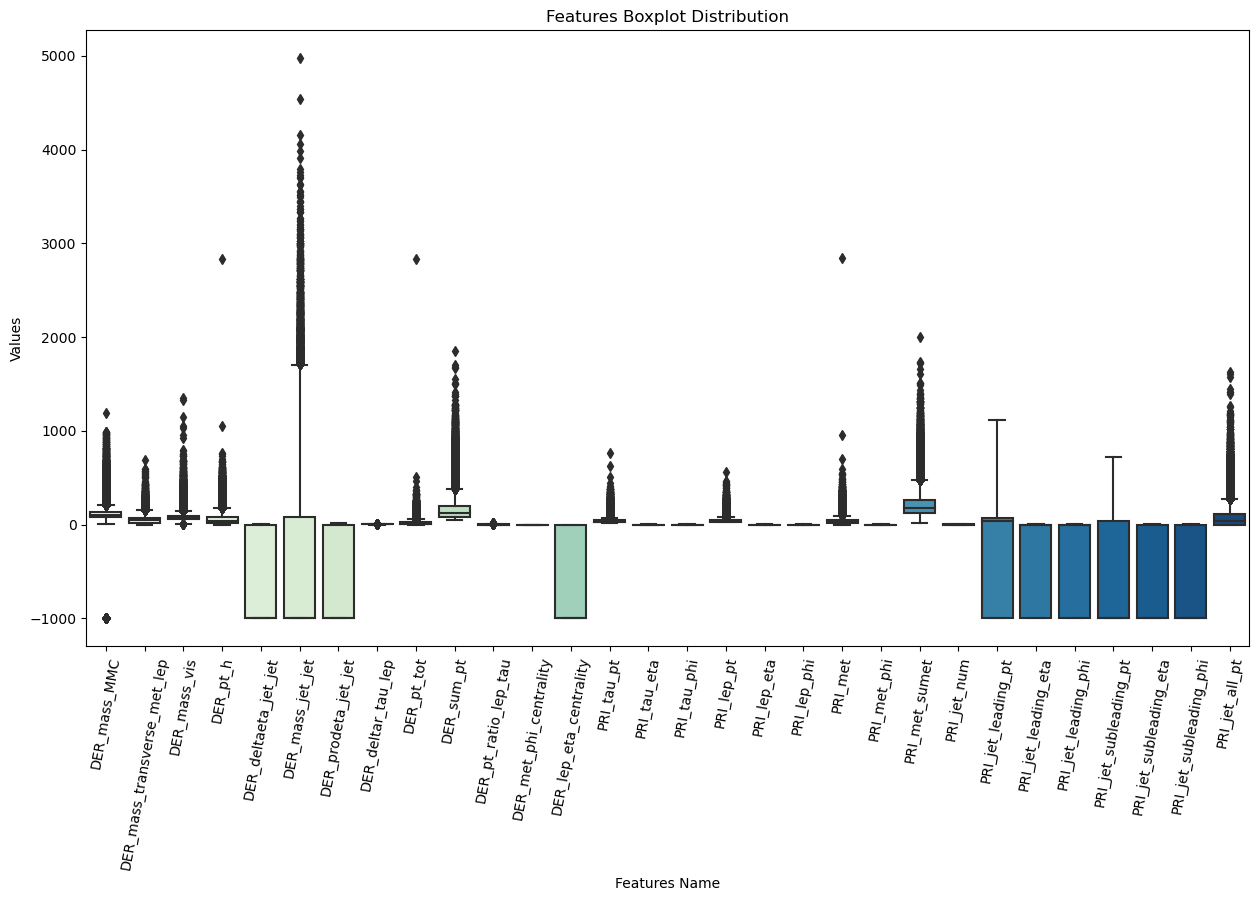

In [ ]:
palette = sns.color_palette("GnBu", n_colors=30)


figure = plt.figure(figsize=(15,8))
ax = sns.boxplot(data = tX, palette = palette)
ax.set_xticklabels(features_name, rotation = 80)
plt.title("Features Boxplot Distribution")
plt.xlabel('Features Name')
plt.ylabel('Values')
plt.show()

In [ ]:
print("There're ", np.round(len(y[y==1])/len(y), 2)*100, " % y=1 data and ", 
      np.round(len(y[y==-1])/len(y)*100, 2), "% y=-1 data" )

There're  34.0  % y=1 data and  65.73 % y=-1 data


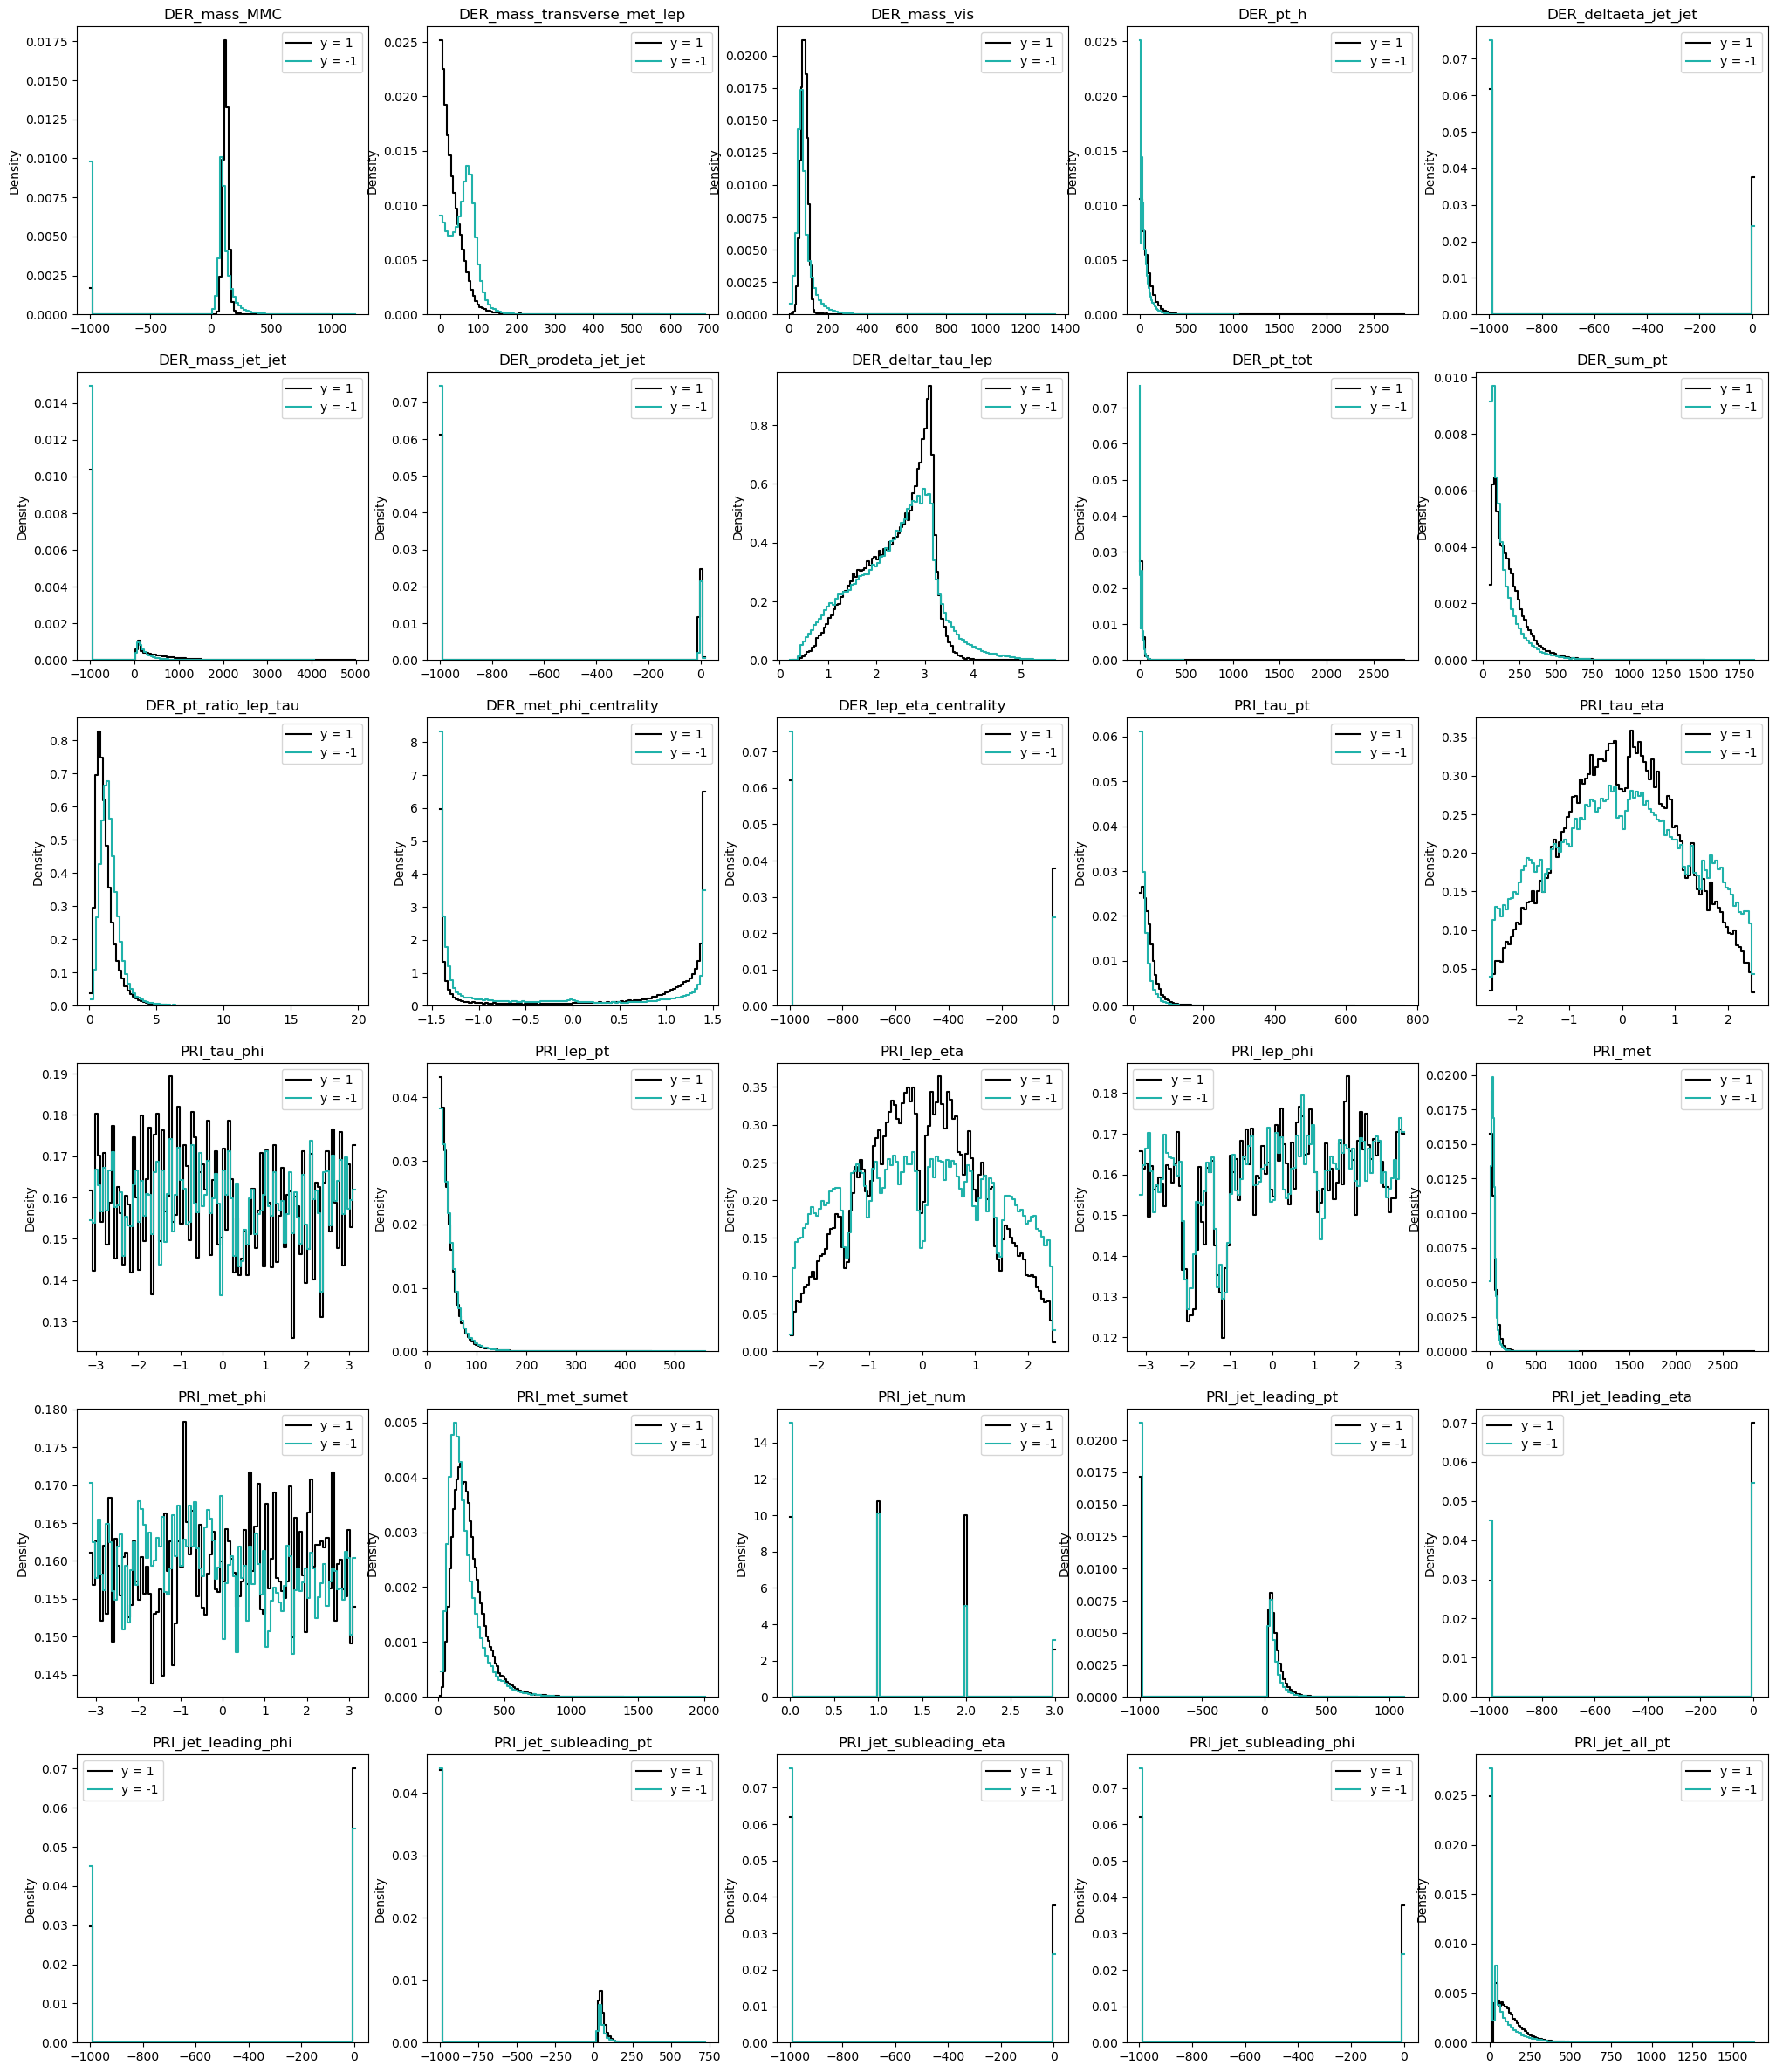

In [ ]:
fig= plt.figure(figsize=(25,30))

for idx in range(tX.shape[1]): 
    ax=plt.subplot(6,5,idx+1)
    
    #density plot of each feature depending on the y response
    sns.histplot(data=tX[y==1, idx], ax=ax, element="step", 
                 fill=False, color = 'black', stat = 'density', bins = 100)
    sns.histplot(data=tX[y==-1, idx], ax=ax, element="step",
                 fill=False, color = 'lightseagreen', stat = 'density', bins = 100)
    
    #plot parameters
    ax.set_title(features_name[idx])
    ax.legend(["y = 1", "y = -1"])

*NB : PRI_met_Phi and PRI_met_summet distribution does not different in function of the output*

# Data Preprocessing

In [17]:
preprocessed_X,preprocessed_X_test, preprocessed_y, _  = preprocess_data_new(tX, tX_test, y)

In [ ]:
palette = sns.color_palette("GnBu", n_colors=30)
figure = plt.figure(figsize=(15,8))
ax = sns.boxplot(data = preprocessed_X['group_3'], palette = palette)
#ax.set_xticklabels(features_name, rotation = 80)
plt.title("Features Boxplot Distribution after Pre-Processing")
plt.xlabel('Features Name')
plt.ylabel('Values')
plt.show()

In [26]:
chosen_group = 'group_0'
preprocessed_X = preprocessed_X[chosen_group]
preprocessed_X_test = preprocessed_X_test[chosen_group]
preprocessed_y = preprocessed_y[chosen_group]

# Method implementation

In [27]:
#Fixed Parameters 
seed = 24
k_fold = 5
max_iters = 100
offset=True 

## Least square with GD

### Parameters in order to tune
- gamma (learning rate)
- D (degree of polynomial thingy)

Tested parameters

- 1 th parameter tested :  {'gamma': 0.1, 'degree': 1, 'max_iters': 100, 'offset': True} 

- 2 th parameter tested :  {'gamma': 0.1, 'degree': 2, 'max_iters': 100, 'offset': True} 

- 3 th parameter tested :  {'gamma': 0.1, 'degree': 3, 'max_iters': 100, 'offset': True} 

- 4 th parameter tested :  {'gamma': 0.1, 'degree': 4, 'max_iters': 100, 'offset': True} 

- 5 th parameter tested :  {'gamma': 0.1, 'degree': 5, 'max_iters': 100, 'offset': True} 

- 6 th parameter tested :  {'gamma': 0.1, 'degree': 6, 'max_iters': 100, 'offset': True} 

- 7 th parameter tested :  {'gamma': 0.1, 'degree': 7, 'max_iters': 100, 'offset': True} 

- 8 th parameter tested :  {'gamma': 0.1, 'degree': 8, 'max_iters': 100, 'offset': True} 

- 9 th parameter tested :  {'gamma': 0.1, 'degree': 9, 'max_iters': 100, 'offset': True} 

Best parameters
 {'gamma': 0.1, 'degree': 6, 'max_iters': 100, 'offset': True}


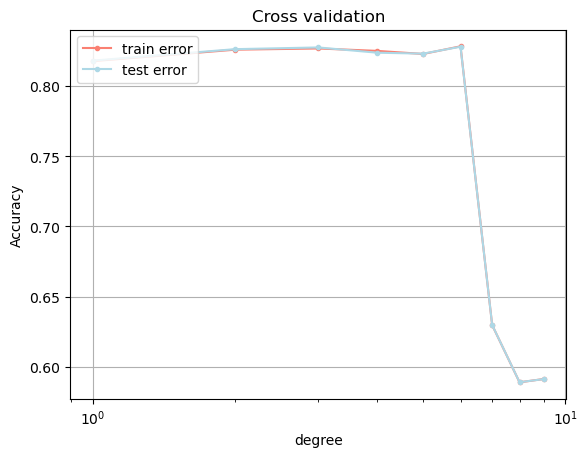

In [30]:
method = least_squares_GD
degree=np.arange(1,10)
gamma = 0.1
parameters_GD = []

for d in degree:
    parameters_GD.append({'gamma':gamma, 'degree':d, 'max_iters':max_iters, 'offset': offset})
    
print_param_test(parameters_GD)

acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_GD, seed=seed, log=False)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters_GD[idx_best])

Tested parameters

- 1 th parameter tested :  {'gamma': 1e-07, 'degree': 6, 'max_iters': 100, 'offset': True} 

- 2 th parameter tested :  {'gamma': 1e-06, 'degree': 6, 'max_iters': 100, 'offset': True} 

- 3 th parameter tested :  {'gamma': 1e-05, 'degree': 6, 'max_iters': 100, 'offset': True} 

- 4 th parameter tested :  {'gamma': 0.0001, 'degree': 6, 'max_iters': 100, 'offset': True} 

- 5 th parameter tested :  {'gamma': 0.001, 'degree': 6, 'max_iters': 100, 'offset': True} 

- 6 th parameter tested :  {'gamma': 0.01, 'degree': 6, 'max_iters': 100, 'offset': True} 

- 7 th parameter tested :  {'gamma': 0.1, 'degree': 6, 'max_iters': 100, 'offset': True} 

- 8 th parameter tested :  {'gamma': 1.0, 'degree': 6, 'max_iters': 100, 'offset': True} 

Best parameters 
 {'gamma': 0.1, 'degree': 6, 'max_iters': 100, 'offset': True} 

--> Test Accuracy for the best parameter :  0.8243218715337299


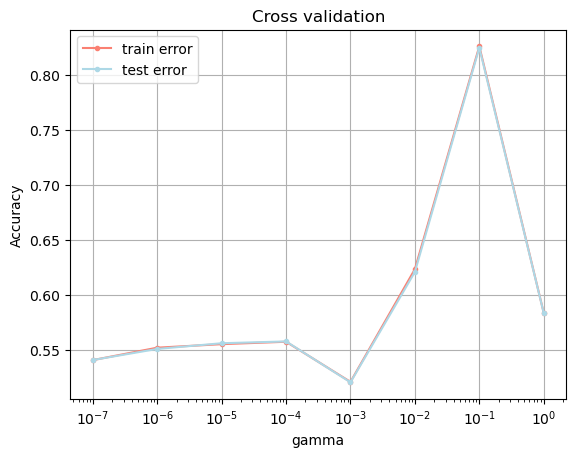

In [32]:
degree = parameters_GD[idx_best]['degree']
gammas= np.logspace(-7, 0, 8)

parameters_GD = []
for g in gammas:
    parameters_GD.append({'gamma':g, 'degree':degree, 'max_iters':max_iters, 'offset':offset})
    
print_param_test(parameters_GD)

acc_tr_gam, acc_te_gam, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_GD, seed=seed, log=False)


cross_validation_visualization(gammas, acc_tr_gam, acc_te_gam, 'gamma')
print('Best parameters \n', parameters_GD[idx_best], '\n')

accuracy_LGD = acc_te_gam[idx_best]
print('\033[1m' +'--> Test Accuracy for the best parameter : '+'\033[0m' , accuracy_LGD)

## Least square with SGD

### Parameters for this method
- degree
- gamma (lr)
- max_iters

Tested parameters

- 1 th parameter tested :  {'gamma': 0.1, 'degree': 1, 'max_iters': 100, 'offset': True} 

- 2 th parameter tested :  {'gamma': 0.1, 'degree': 2, 'max_iters': 100, 'offset': True} 

- 3 th parameter tested :  {'gamma': 0.1, 'degree': 3, 'max_iters': 100, 'offset': True} 

- 4 th parameter tested :  {'gamma': 0.1, 'degree': 4, 'max_iters': 100, 'offset': True} 

- 5 th parameter tested :  {'gamma': 0.1, 'degree': 5, 'max_iters': 100, 'offset': True} 

- 6 th parameter tested :  {'gamma': 0.1, 'degree': 6, 'max_iters': 100, 'offset': True} 

- 7 th parameter tested :  {'gamma': 0.1, 'degree': 7, 'max_iters': 100, 'offset': True} 

- 8 th parameter tested :  {'gamma': 0.1, 'degree': 8, 'max_iters': 100, 'offset': True} 

- 9 th parameter tested :  {'gamma': 0.1, 'degree': 9, 'max_iters': 100, 'offset': True} 

Best parameters
 {'gamma': 0.1, 'degree': 4, 'max_iters': 100, 'offset': True}


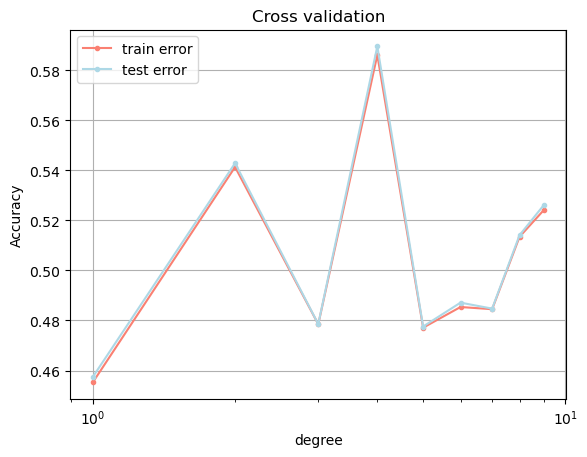

In [33]:
method = least_squares_SGD
degree=np.arange(1,10)
gamma = 0.1

parameters_SDG = []
for d in degree:
    parameters_SDG.append({'gamma':gamma, 'degree':d, 
                           'max_iters':max_iters,'offset':offset})
    
print_param_test(parameters_SDG)

acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_SDG, seed=seed, log = False)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters_SDG[idx_best])

Tested parameters

- 1 th parameter tested :  {'gamma': 1e-07, 'degree': 4, 'max_iters': 100, 'offset': True} 

- 2 th parameter tested :  {'gamma': 1e-06, 'degree': 4, 'max_iters': 100, 'offset': True} 

- 3 th parameter tested :  {'gamma': 1e-05, 'degree': 4, 'max_iters': 100, 'offset': True} 

- 4 th parameter tested :  {'gamma': 0.0001, 'degree': 4, 'max_iters': 100, 'offset': True} 

- 5 th parameter tested :  {'gamma': 0.001, 'degree': 4, 'max_iters': 100, 'offset': True} 

- 6 th parameter tested :  {'gamma': 0.01, 'degree': 4, 'max_iters': 100, 'offset': True} 

- 7 th parameter tested :  {'gamma': 0.1, 'degree': 4, 'max_iters': 100, 'offset': True} 

- 8 th parameter tested :  {'gamma': 1.0, 'degree': 4, 'max_iters': 100, 'offset': True} 

Best parameters
 {'gamma': 0.01, 'degree': 4, 'max_iters': 100, 'offset': True}
--> Test Accuracy for the best parameter :  0.5749924372290007


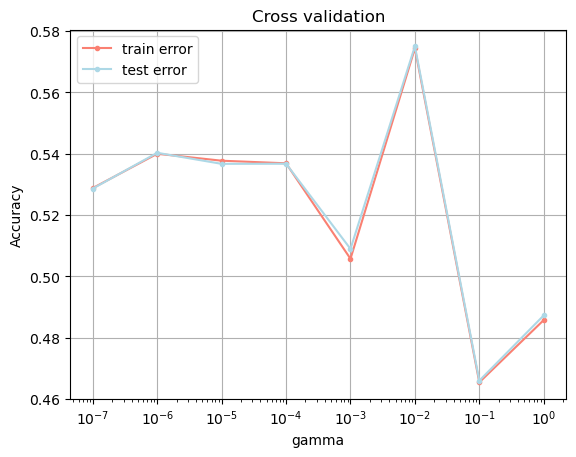

In [34]:
degree = parameters_SDG[idx_best]['degree']
gammas= np.logspace(-7, 0, 8)

parameters_SDG = []
for g in gammas:
    parameters_SDG.append({'gamma':g, 'degree':degree, 'max_iters':max_iters, 'offset':offset})

print_param_test(parameters_SDG)

acc_tr_gam, acc_te_gam, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_SDG, seed=seed)


cross_validation_visualization(gammas, acc_tr_gam, acc_te_gam, 'gamma')
print('Best parameters\n', parameters_SDG[idx_best])

accuracy_LSGD = acc_te_gam[idx_best]
print('\033[1m' +'--> Test Accuracy for the best parameter : '+'\033[0m' , accuracy_LSGD)

## Least square 

### Parameters to tune for this method
- degree
  

Not done yet. Singular matrix error. Flemme.

Tested parameters

- 1 th parameter tested :  {'degree': 1, 'offset': True} 

- 2 th parameter tested :  {'degree': 2, 'offset': True} 

- 3 th parameter tested :  {'degree': 3, 'offset': True} 

- 4 th parameter tested :  {'degree': 4, 'offset': True} 

- 5 th parameter tested :  {'degree': 5, 'offset': True} 

- 6 th parameter tested :  {'degree': 6, 'offset': True} 

- 7 th parameter tested :  {'degree': 7, 'offset': True} 

- 8 th parameter tested :  {'degree': 8, 'offset': True} 

- 9 th parameter tested :  {'degree': 9, 'offset': True} 

Best parameters
 {'degree': 9, 'offset': True}
--> Test Accuracy for the best parameter :  0.8446203488958354


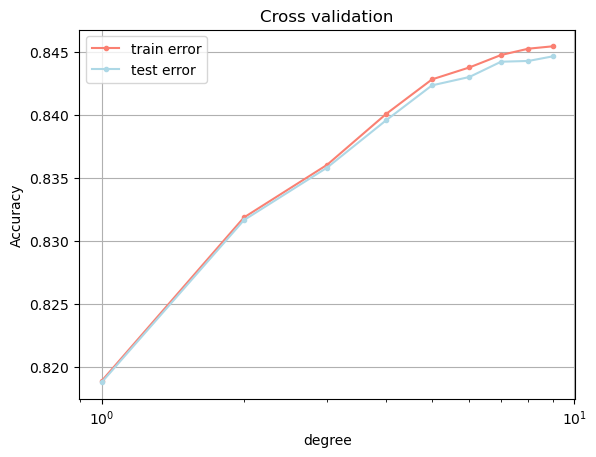

In [36]:
method = least_squares
degree = np.arange(1,10)

parameters_LS = []
for d in degree:
    parameters_LS.append({'degree':d, 'offset':offset })
    
print_param_test(parameters_LS)

acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_LS, seed=seed)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters_LS[idx_best])

accuracy_LS = acc_te_deg[idx_best]
print('\033[1m' +'--> Test Accuracy for the best parameter : '+'\033[0m', accuracy_LS)

## Ride Regression 

### Parameters for this method
- degree
- lambda_

Tested parameters

- 1 th parameter tested :  {'lambda_': 0.1, 'degree': 1, 'offset': True} 

- 2 th parameter tested :  {'lambda_': 0.1, 'degree': 2, 'offset': True} 

- 3 th parameter tested :  {'lambda_': 0.1, 'degree': 3, 'offset': True} 

- 4 th parameter tested :  {'lambda_': 0.1, 'degree': 4, 'offset': True} 

- 5 th parameter tested :  {'lambda_': 0.1, 'degree': 5, 'offset': True} 

- 6 th parameter tested :  {'lambda_': 0.1, 'degree': 6, 'offset': True} 

- 7 th parameter tested :  {'lambda_': 0.1, 'degree': 7, 'offset': True} 

- 8 th parameter tested :  {'lambda_': 0.1, 'degree': 8, 'offset': True} 

- 9 th parameter tested :  {'lambda_': 0.1, 'degree': 9, 'offset': True} 

Best parameters
 {'lambda_': 0.1, 'degree': 9, 'offset': True}


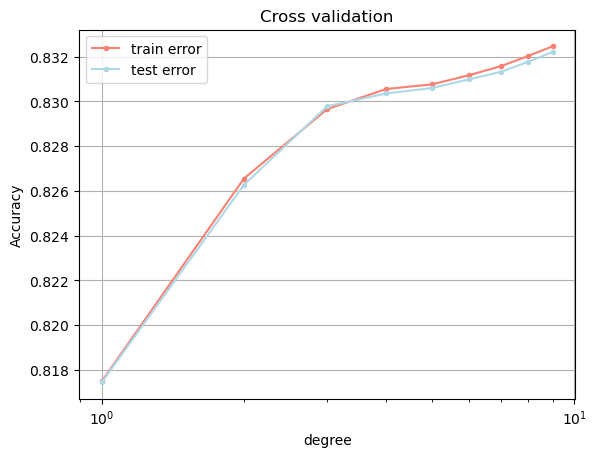

In [37]:
method = ridge_regression
degree=np.arange(1,10)
lambda_ = 0.1


parameters_RR = []
for d in degree:
    parameters_RR.append({'lambda_':lambda_, 'degree':d,  'offset':offset})

print_param_test(parameters_RR)
    
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_RR, seed=seed)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters_RR[idx_best])

Tested parameters

- 1 th parameter tested :  {'lambda_': 1e-09, 'degree': 8, 'offset': True} 

- 2 th parameter tested :  {'lambda_': 1.9306977288832496e-08, 'degree': 8, 'offset': True} 

- 3 th parameter tested :  {'lambda_': 3.727593720314938e-07, 'degree': 8, 'offset': True} 

- 4 th parameter tested :  {'lambda_': 7.196856730011529e-06, 'degree': 8, 'offset': True} 

- 5 th parameter tested :  {'lambda_': 0.0001389495494373139, 'degree': 8, 'offset': True} 

- 6 th parameter tested :  {'lambda_': 0.002682695795279727, 'degree': 8, 'offset': True} 

- 7 th parameter tested :  {'lambda_': 0.05179474679231223, 'degree': 8, 'offset': True} 

- 8 th parameter tested :  {'lambda_': 1.0, 'degree': 8, 'offset': True} 

Best parameters
 {'lambda_': 1e-09, 'degree': 8, 'offset': True}
--> Test Accuracy for the best parameter :  0.8438539881012403


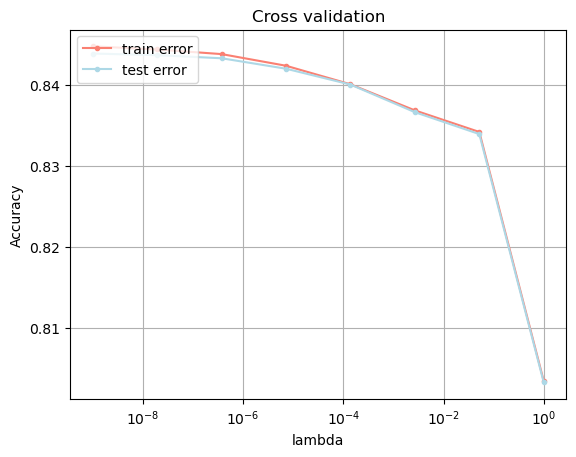

In [38]:
method = ridge_regression

degree = parameters_RR[idx_best]['degree']
lambdas_ = np.logspace(-9, 0, 8)
parameters_RR = []
for lambda_ in lambdas_:
    parameters_RR.append({'lambda_':lambda_, 'degree':degree,  'offset':offset})

acc_tr_lamb, acc_te_lamb, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_RR, seed=seed)

print_param_test(parameters_RR)

cross_validation_visualization(lambdas_, acc_tr_lamb, acc_te_lamb, 'lambda')
print('Best parameters\n', parameters_RR[idx_best])

accuracy_R = acc_te_lamb[idx_best]
print('\033[1m' +'--> Test Accuracy for the best parameter : '+'\033[0m', accuracy_R)

## Logistic

### Parameters for this method
- initinal_w (set to 0 for simplicity)
- max_iters
- gamma
- degree

Tested parameters

- 1 th parameter tested :  {'gamma': 0.01, 'degree': 1, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 2 th parameter tested :  {'gamma': 0.01, 'degree': 2, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 3 th parameter tested :  {'gamma': 0.01, 'degree': 3, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 4 th parameter tested :  {'gamma': 0.01, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 5 th parameter tested :  {'gamma': 0.01, 'degree': 5, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 6 th parameter tested :  {'gamma': 0.01, 'degree': 6, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 7 th parameter tested :  {'gamma': 0.01, 'degree': 7, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 8 th parameter tested :  {'gamma': 0.01, 'degree': 8, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 9 th parameter tested :  {'gamma': 0.01, 'degree': 9, 'max_iters': 100, 'initial_w': None, 

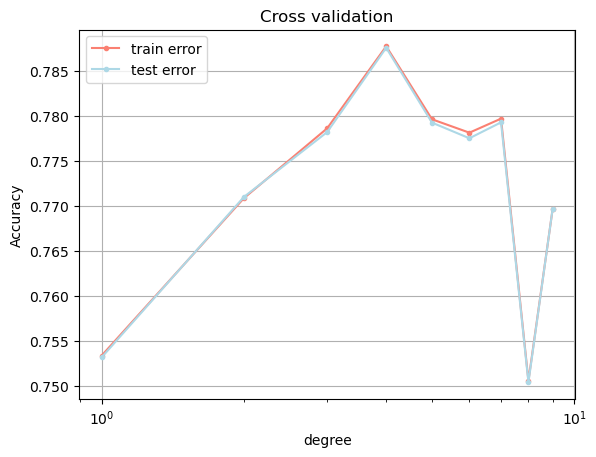

In [39]:
method = logistic_regression
degree = np.arange(1,10)
gamma = 0.01 # note lower gamma here. Otherwise no convergence.
parameters_log = []

for d in degree:
    parameters_log.append({'gamma':gamma, 'degree':d, 'max_iters':max_iters, 'initial_w':None, 'offset':offset})

print_param_test(parameters_log)
      
acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_log, seed=seed, log=True)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters_log[idx_best])

Tested parameters

- 1 th parameter tested :  {'gamma': 1e-08, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 2 th parameter tested :  {'gamma': 1.389495494373136e-07, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 3 th parameter tested :  {'gamma': 1.9306977288832498e-06, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 4 th parameter tested :  {'gamma': 2.6826957952797274e-05, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 5 th parameter tested :  {'gamma': 0.0003727593720314938, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 6 th parameter tested :  {'gamma': 0.005179474679231202, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 7 th parameter tested :  {'gamma': 0.07196856730011514, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True} 

- 8 th parameter tested :  {'gamma': 1.0, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': 

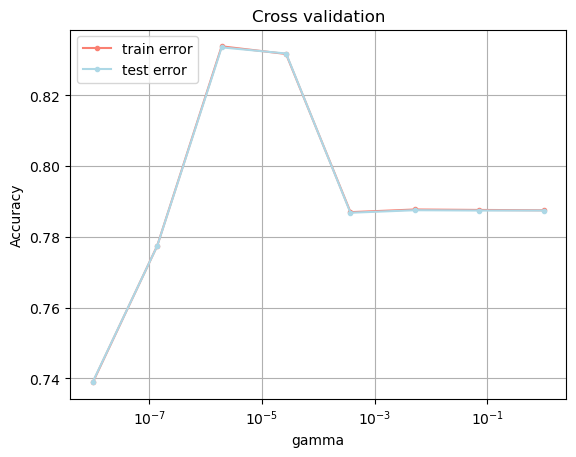

In [40]:
method = logistic_regression
degree = parameters_log[idx_best]['degree']
gammas= np.logspace(-8, 0, 8)
parameters_log = []


for g in gammas:
    parameters_log.append({'gamma':g, 'degree':degree, 'max_iters':max_iters, 'initial_w':None,'offset':offset})

print_param_test(parameters_log)    
    
acc_tr_gam, acc_te_gam, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_log, seed=seed, log=True)


cross_validation_visualization(gammas, acc_tr_gam, acc_te_gam, 'gamma')
print('Best parameters\n', parameters_log[idx_best])

accuracy_Log = acc_te_gam[idx_best]
print('\033[1m' +'--> Test Accuracy for the best parameter : '+'\033[0m', accuracy_Log)

In [87]:
run(logistic_regression, parameters_log[idx_best])

{'gamma': 1.389495494373136e-07, 'max_iters': 50, 'initial_w': None}
train accuracy  0.7409329379562044


## Regularized logistic

Tested parameters

- 1 th parameter tested :  {'gamma': 0.01, 'degree': 1, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 2 th parameter tested :  {'gamma': 0.01, 'degree': 2, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 3 th parameter tested :  {'gamma': 0.01, 'degree': 3, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 4 th parameter tested :  {'gamma': 0.01, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 5 th parameter tested :  {'gamma': 0.01, 'degree': 5, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 6 th parameter tested :  {'gamma': 0.01, 'degree': 6, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 7 th parameter tested :  {'gamma': 0.01, 'degree': 7, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 8 th parameter tested :  {'gamma': 0.01, 'degree': 8, 'max_iters': 100, 'initial_w': None,

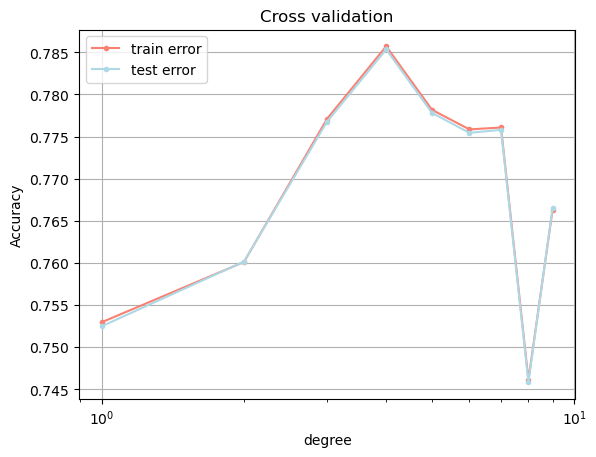

In [41]:
method = reg_logistic_regression
degree = np.arange(1,10)
gamma = 0.01 # note lower gamma here. Otherwise no convergence.
lambda_=0.1

parameters_RL = []
for d in degree:
    parameters_RL.append({'gamma':gamma, 'degree':d, 'max_iters':max_iters, 'initial_w':None, 'offset':offset, 'lambda_':lambda_})

print_param_test(parameters_RL)

acc_tr_deg, acc_te_deg, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_RL, seed=seed, log=True)


cross_validation_visualization(degree, acc_tr_deg, acc_te_deg, 'degree')
print('Best parameters\n', parameters_RL[idx_best])

Tested parameters

- 1 th parameter tested :  {'gamma': 1e-08, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 2 th parameter tested :  {'gamma': 1.389495494373136e-07, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 3 th parameter tested :  {'gamma': 1.9306977288832498e-06, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 4 th parameter tested :  {'gamma': 2.6826957952797274e-05, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 5 th parameter tested :  {'gamma': 0.0003727593720314938, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 6 th parameter tested :  {'gamma': 0.005179474679231202, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.1} 

- 7 th parameter tested :  {'gamma': 0.07196856730011514, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_

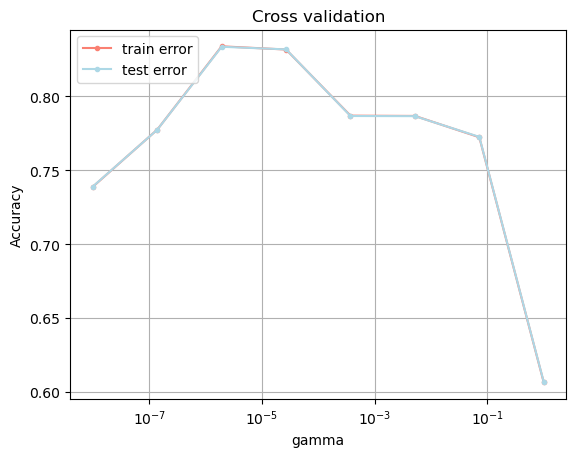

In [42]:
method = reg_logistic_regression
degree = parameters_RL[idx_best]['degree']
gamma = np.logspace(-8, 0, 8) # note lower gamma here. Otherwise no convergence.
lambda_=0.1

parameters_RL = []
for g in gamma:
    parameters_RL.append({'gamma':g, 'degree':degree, 'max_iters':max_iters, 'initial_w':None, 'offset':offset, 'lambda_':lambda_})

print_param_test(parameters_RL)

acc_tr_gam, acc_te_gam, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_RL, seed=seed, log=True)


cross_validation_visualization(gamma, acc_tr_gam, acc_te_gam, 'gamma')
print('Best parameters\n', parameters_RL[idx_best])

Tested parameters

- 1 th parameter tested :  {'gamma': 1.9306977288832498e-06, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 1e-09} 

- 2 th parameter tested :  {'gamma': 1.9306977288832498e-06, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 1.9306977288832496e-08} 

- 3 th parameter tested :  {'gamma': 1.9306977288832498e-06, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 3.727593720314938e-07} 

- 4 th parameter tested :  {'gamma': 1.9306977288832498e-06, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 7.196856730011529e-06} 

- 5 th parameter tested :  {'gamma': 1.9306977288832498e-06, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.0001389495494373139} 

- 6 th parameter tested :  {'gamma': 1.9306977288832498e-06, 'degree': 4, 'max_iters': 100, 'initial_w': None, 'offset': True, 'lambda_': 0.002682695795279727} 

- 7 th parameter te

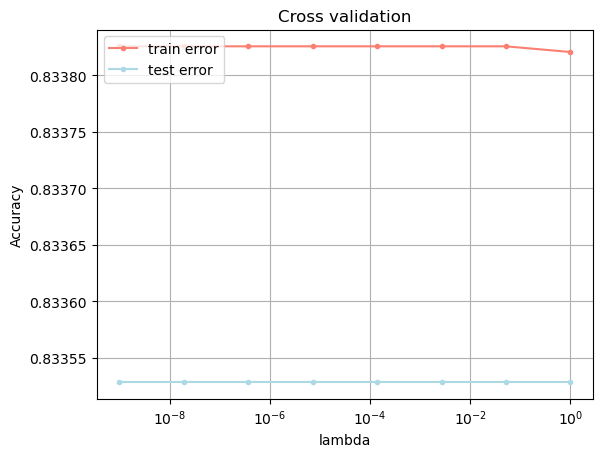

In [43]:
method = reg_logistic_regression
degree = degree
gamma = parameters_RL[idx_best]['gamma'] # note lower gamma here. Otherwise no convergence.
lambda_=np.logspace(-9, 0, 8)

parameters_RL = []
for l in lambda_:
    parameters_RL.append({'gamma':gamma, 'degree':degree, 'max_iters':max_iters, 'initial_w':None, 'offset':offset, 'lambda_':l})
print_param_test(parameters_RL)
acc_tr_lamb, acc_te_lamb, idx_best = cross_tunning(preprocessed_y, preprocessed_X,
                                         k_fold=k_fold, method=method , parameters=parameters_RL, seed=seed, log=True)


cross_validation_visualization(lambda_, acc_tr_lamb, acc_te_lamb, 'lambda')
print('Best parameters\n', parameters_RL[idx_best])

accuracy_reg_log = acc_te_lamb[idx_best]
print('Test Accuracy for the best params : ' , accuracy_reg_log)

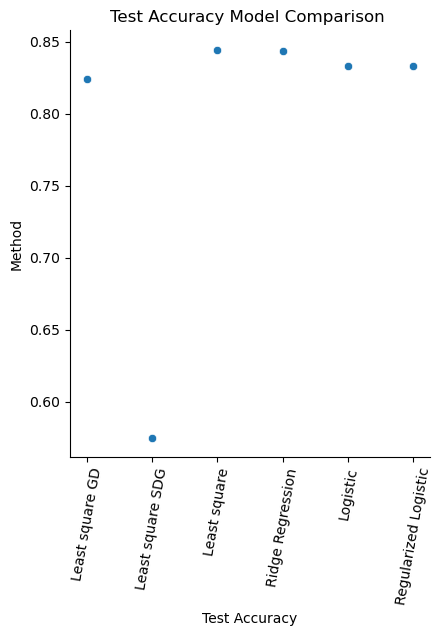

In [44]:
Methods = ['Least square GD', 'Least square SDG', 'Least square', 'Ridge Regression', 'Logistic', 'Regularized Logistic']
Accuracy = [accuracy_LGD,accuracy_LSGD, accuracy_LS, accuracy_R, accuracy_Log, accuracy_reg_log]


ax =sns.relplot(x=Methods, y=Accuracy)
ax.set_xticklabels(rotation = 80)
plt.title("Test Accuracy Model Comparison ")
plt.xlabel('Test Accuracy')
plt.ylabel('Method')
plt.show()
plt.show()

In [51]:
for idx, acc in Accuracy : 
    print ("The Test Accuracy for the ", Methods[idx], "Method is :", acc , '\n')

TypeError: cannot unpack non-iterable numpy.float64 object